# UCI Air Quality - Exploratory Data Analysis


In this project, we'll be exploring the Air Quality Dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/360/air+quality). The dataset has records from March 2004 to February 2005 of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor device.

## Contents

1. [**Overview**](#1.-Overview)
2. [**Exploratory Data Analysis**](#2.-Exploratory-Data-Analysis)
    
    1. [**Dealing with Missing Values**](#2.2-Dealing-with-Missing-Values)
    
    3. [**Analysing Data Distribution**](#2.3-Analysing-Data-Distribution)
    
    4. [**Correlation Analysis**](#2.4-Correlation-Analysis)
    
    5. [**Analysing Temporal Behavior**](#2.5-Analysing-Temporal-Behavior)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore') 

sns.set(font_scale=1.2)
sns.set_palette("pastel")

## 1. Overview
___

The dataset comprises 9358 instances of hourly averaged responses from a set of 5 metal oxide chemical sensors integrated into an Air Quality Chemical Multisensor device. The device was installed on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005.

### Dataset columns description

- **CO (GT)**: Averaged concentration CO in mg/m^3 (reference analyzer)
- **PT08S1(CO)**: Averaged sensor response
- **NMHC(GT)**:  Averaged overall Non Metanic HydroCarbons concentration in microg/m^3
- **PT08.S2(NMHC)**: Averaged sensor response
- **NOx(GT)**: Averaged NOx concentration in ppb
- **PT08.S3(NOx)**: Averaged sensor response
- **NO2(GT)**: Averaged NO2 concentration in microg/m^3
- **PT08.S4(NO2)**: Averaged sensor response
- **PT08.S5(O3)**: Averaged sensor response O3
- **C6H6(GT)**: Averaged Benzene concentration in microg/m^3
- **T**: Temperature
- **RH**: Relative humidity
- **AH**: Absolute humidity


## 2. Exploratory Data Analysis
___


### Loading Data

Loading the Air Quality dataset from ucimlrepo library into a **pandas dataframe**:

In [2]:
air_quality_repo = fetch_ucirepo(id=360) 
df_orig = air_quality_repo.data.features 

In [3]:
df_orig.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [4]:
df_orig.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [6]:
df_orig.shape

(9357, 15)

We'll be manipulating some of the data, so let's create a copy of the dataframe:

In [7]:
df = df_orig.copy()

## 2.2 Dealing with Missing Values
___

The missing values of the dataset are tagged with -200 value. Here we will replace it with a NaN value and check the percentage presented in each feature. 

In [8]:
df = df.replace(to_replace=-200, value=np.NaN).copy()

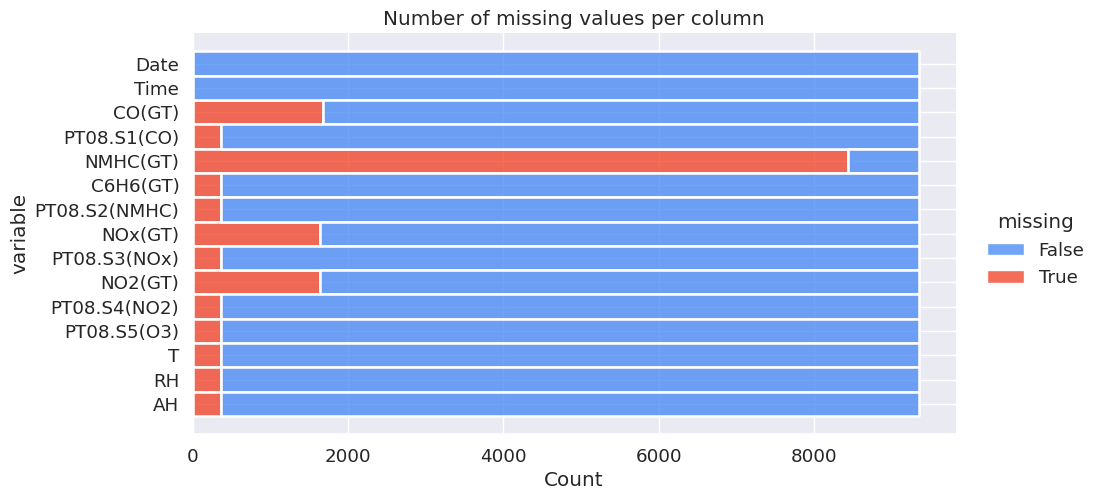

In [9]:
ax = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette=["#4285F4", "#F13C20"],
    multiple="stack",
    aspect=2
)
plt.title("Number of missing values per column")
plt.show()

### Removing columns with over 90% null values

In the above plot we can see that over 90% of the NMHC(GT) pollutant data is missing. Therefore, we can safely remove this column from the dataset, as these missing values are unlikely to contribute significantly to our analysis.

In [10]:
gt90_nulls = df.columns[df.isnull().mean()>0.9]
print("Columns with more than 90% null values =", list(gt90_nulls))

Columns with more than 90% null values = ['NMHC(GT)']


In [11]:
df = df.drop(columns=gt90_nulls)

### Applying fill forward to replace the missing values

We can try to replace the rest of the null values by taking the mean/median of each entire column. However, this approach might not yield an accurate replacement. Therefore, we will instead apply a forward-fill method to address these missing values.

In [12]:
def fill_forward_indefinitely(df_input: pd.DataFrame, value_col: str):
    """
    Applies fill forward to replace the missing values of a column of the dataframe.
    
    Args:
        df_input(pd.DataFrame): original dataframe 
        value_col(str): name of the column to fill the missing values
    """
    
    # Creates a copy of the original dataframe
    previous_df = df_input.copy()
    
    while True:
        df_input[value_col].fillna(method='ffill', inplace=True)
        
        # Check if the DataFrame has not changed and interrupts the loop
        if previous_df.equals(df_input):
            break

        # Update the previous_df after forward filling
        previous_df = df_input.copy()

    # Applies same logic for backward filling (cases where we don't have a start measure)
    while True:
        df_input[value_col].fillna(method='bfill', inplace=True)
        
        # Check if the DataFrame has not changed and interrupts the loop
        if previous_df.equals(df_input):
            break

        # Update the previous_df after forward filling
        previous_df = df_input.copy()
        

The function defined above takes a dataframe and the name of a column as parameters and iteratively applies the forwoard-fill method to the specified column until there are no more null values remaining.

In [13]:
for column in df.columns[df.isnull().any()]: 
    fill_forward_indefinitely(df, column)

In [14]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1023.5+ KB


## 2.3 Analysing Data Distribution
___

In this segment, we will analyze the data distribuion of each feature in the dataset.

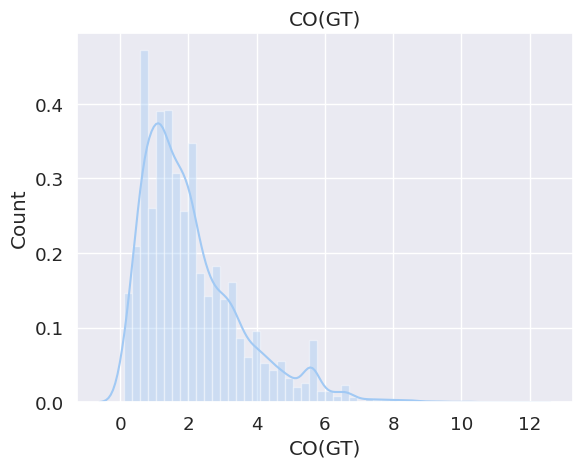

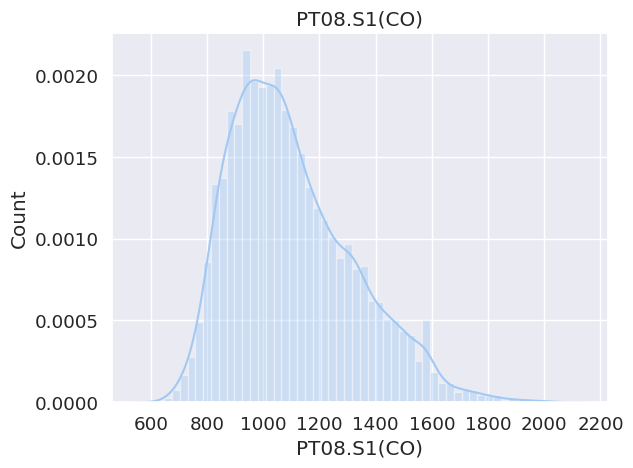

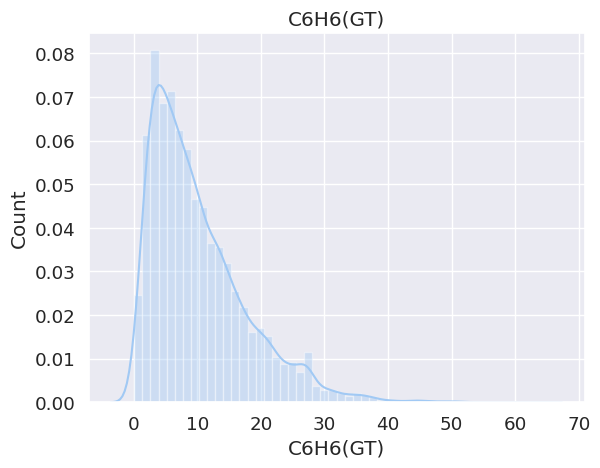

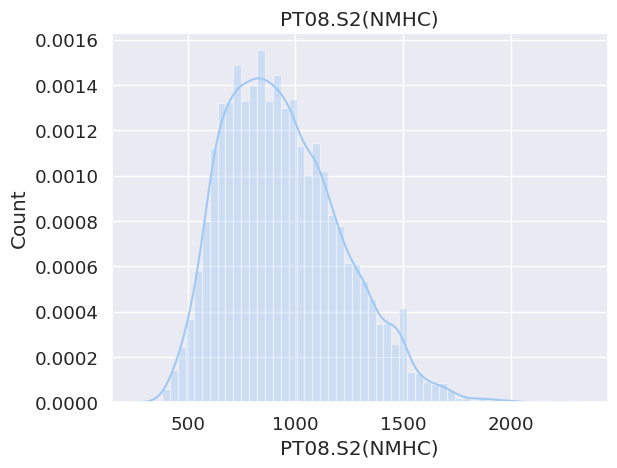

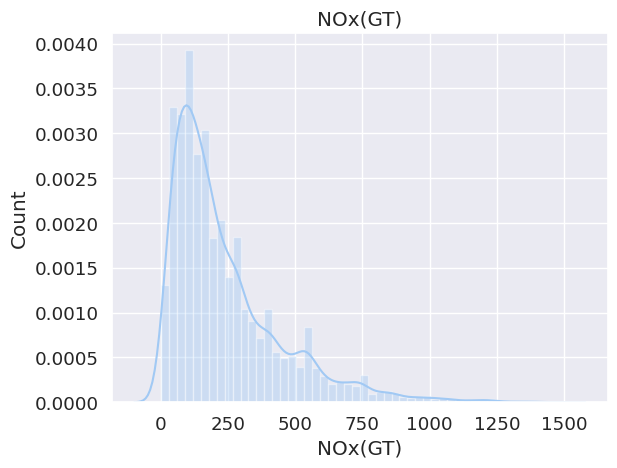

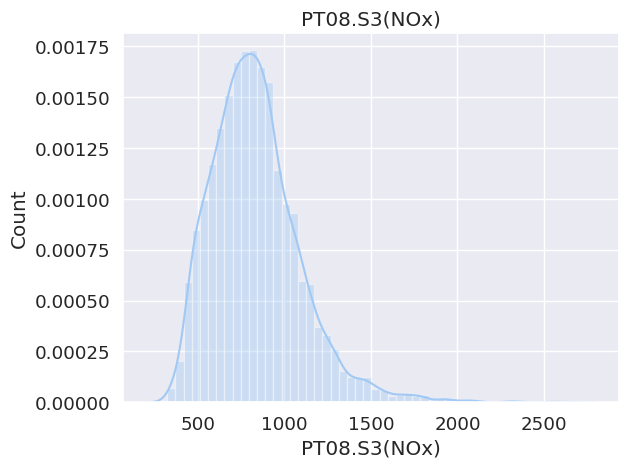

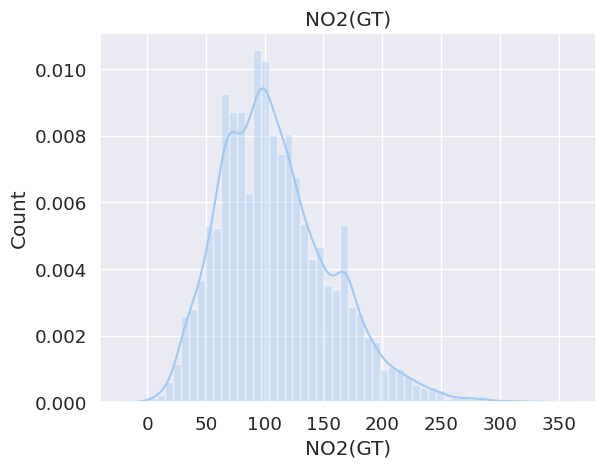

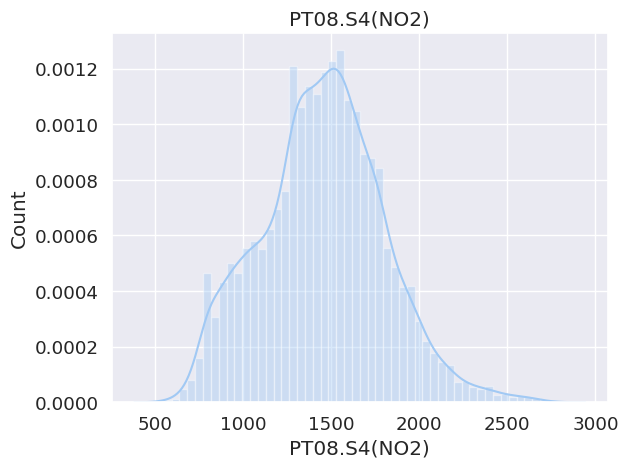

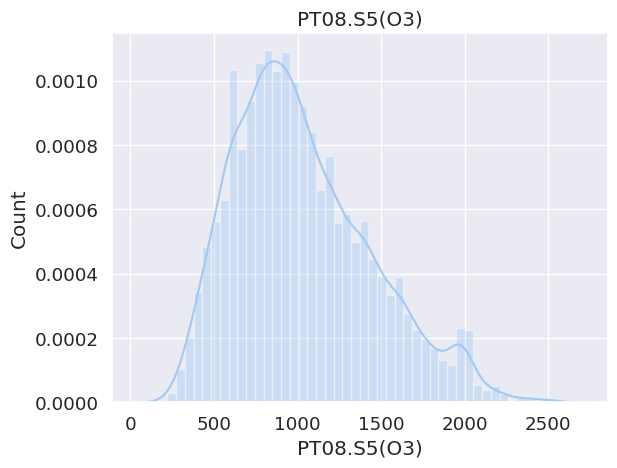

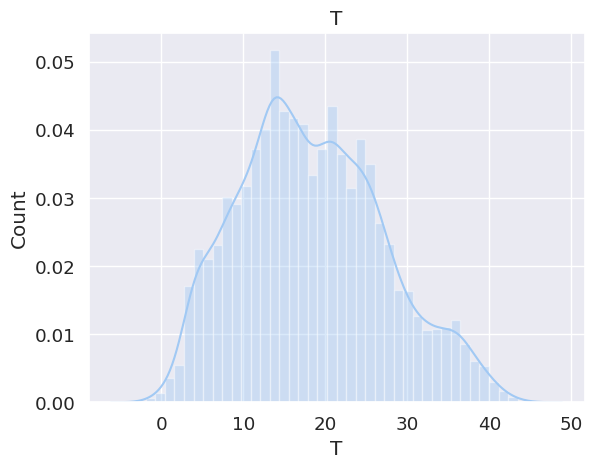

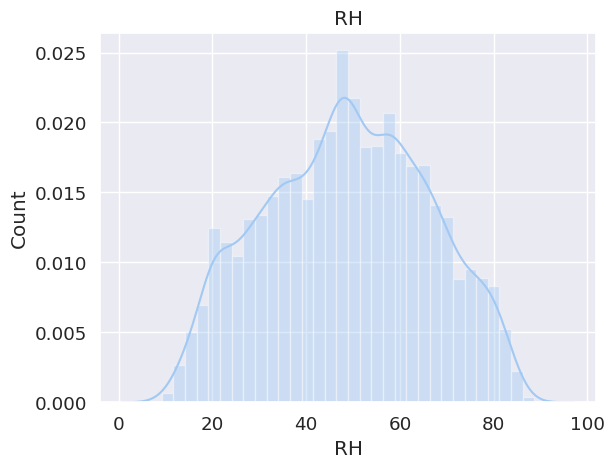

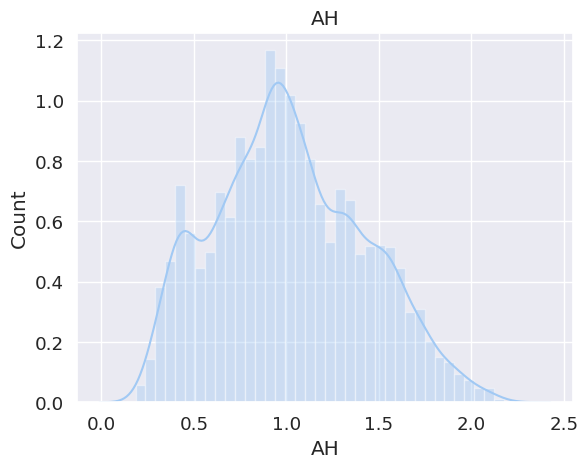

In [16]:
for column in df.columns:
    if df[column].dtype!="O":
        sns.distplot(df[column])
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.title(column)
        plt.show()

It is observed that the majority of the histograms exhibit a right-skewed distribution, indicating that most of the data is clustered towards the lower end of the scale.

Due to this skewness, we could consider applying transformations to the data during the implementation of the Regression Model in our future work. It could improve the distribution and address the skewness, which may lead to better results in modelling. 

## 2.4 Correlation Analysis
___

In this section, we present the correlation analysis between the features of the dataset and the target feature (relative humidity RH)

First, scatter plots are show to visualize the relationship between each feature and the target. Following that, a correlation matrix is provided for a comprehensive analysis of the relationships between the variables.

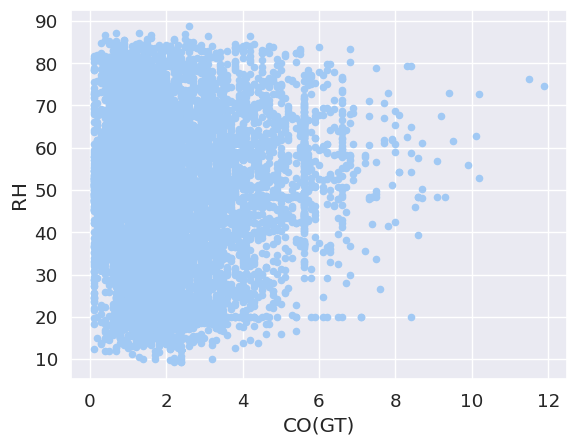

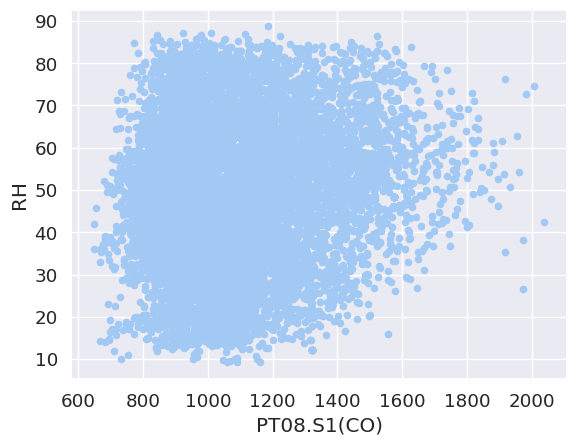

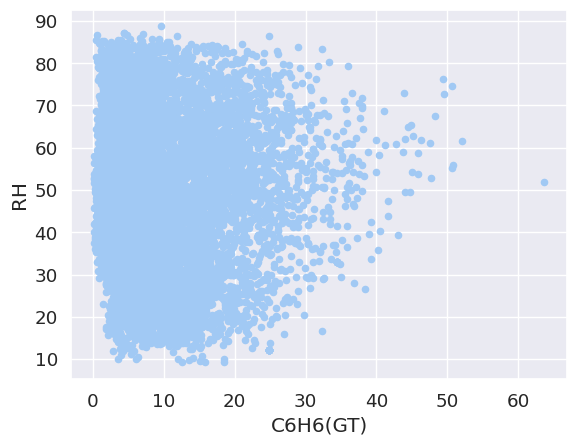

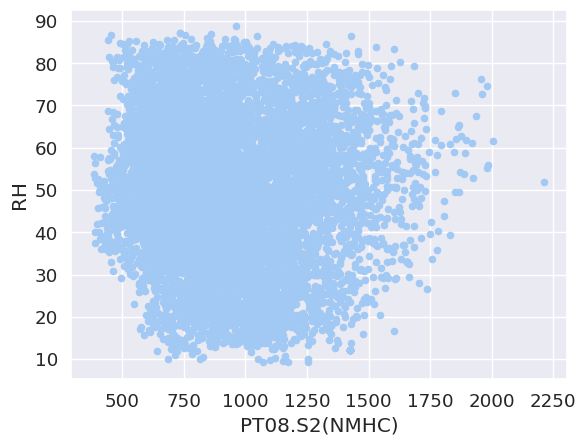

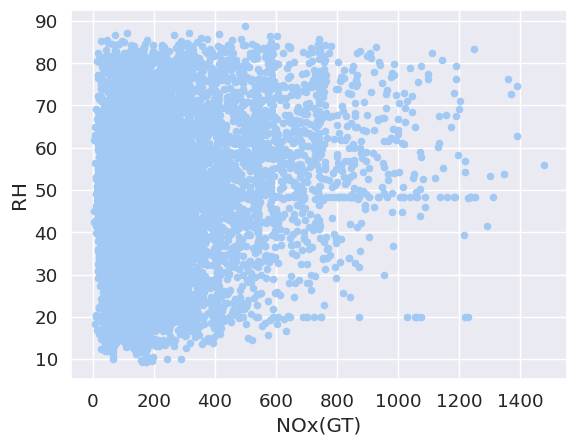

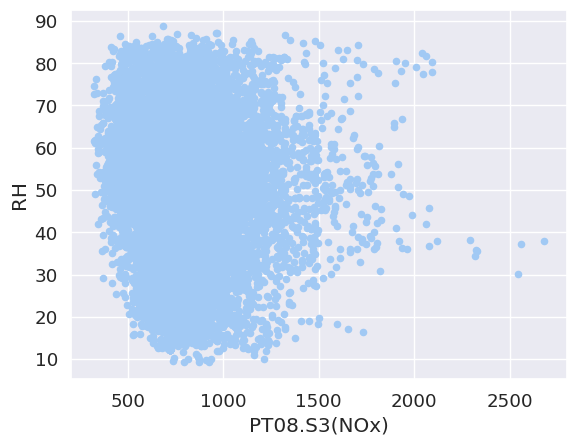

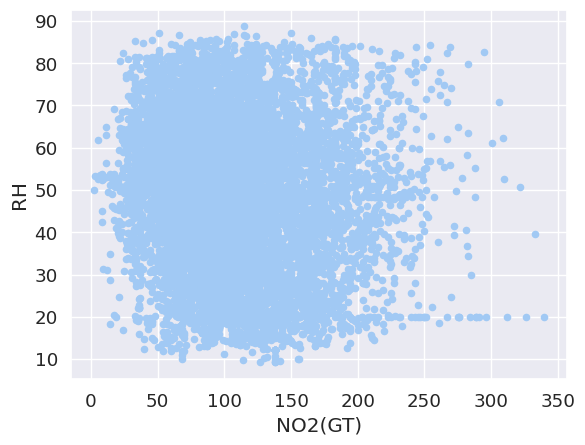

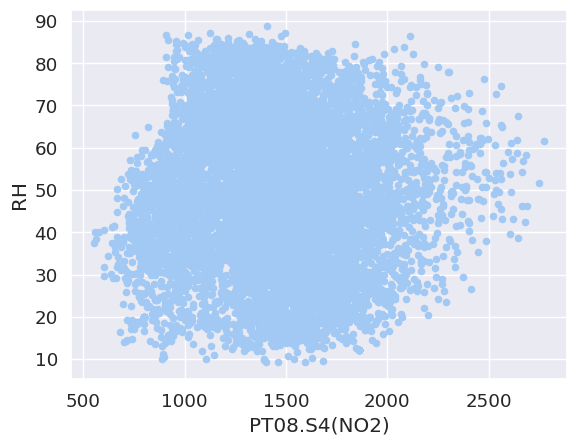

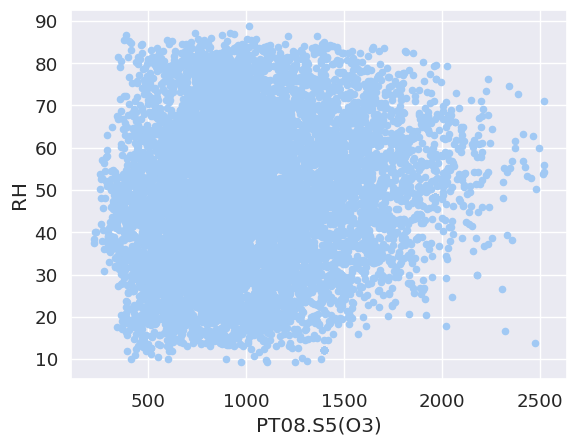

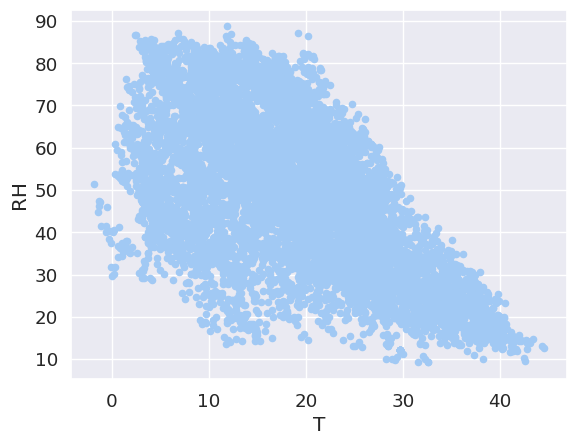

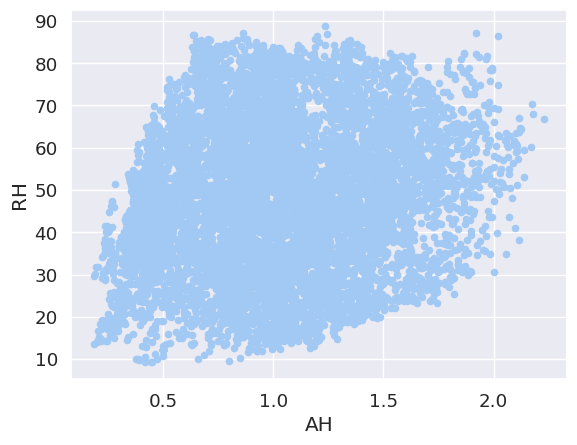

In [17]:
for column in df.columns:
    if column!='RH' and df[column].dtype!="O":
        data = pd.concat([df['RH'], df[column]], axis=1)
        data.plot.scatter(x=column, y='RH')
        plt.show()

From the scatter plots, we can see that initially there is no clear pattern between the pollutant's concentration level and the Relative Humidity.

However, we can observe a strong negative association between Relative Humidity and Temperature, indicating that as Relative Humidity increases, the Temperature tends to decrease. 

This relationship is consistent with the principle that warmer air can hold more moisture, resulting in lower relative humidity as temperature rise.

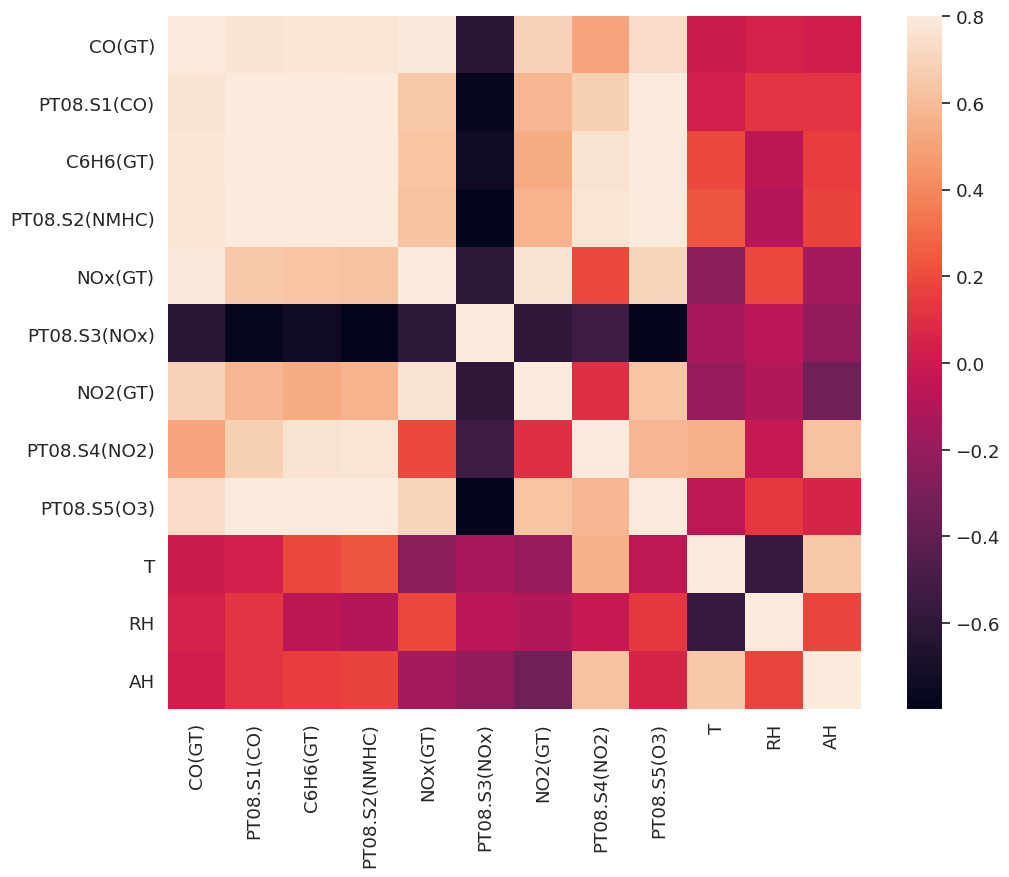

In [18]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

The correlation matrix above indicates a strong correlation among pollutant levels, with the exception of PT08.S3(NOx).

It also reveals a weaker correlation between poluttant levels and the Relative Humidity and a strong negative correlation between the Relative Humidity and Temperature, aligning with our observations from the scatter plots. 

## 2.5 Analysing Temporal Behavior
___

Is there a particular time when pollutant levels are elevated?

To analyse this, let's first create additional columns representing the `Year`, `Month`, `Day of the Week` and `Hour` of each record. 

In [19]:
df["Date"] = pd.to_datetime(df["Date"])

In [20]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek

In [21]:
df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour

Now, let's visualize the data for each pollutant across each month, day of week and hour. 

In [22]:
def plot_temporal_behavior(df_input: pd.DataFrame, value_col: str):
    """
    Display the temporal behavior of the specified data.
    
    Args:
        df_input(pd.DataFrame): original dataframe 
        value_col(str): name of the column to create the plots
    """
    
    hour_df = df_input.groupby("Hour")[value_col].mean().reset_index()
    dayweek_df = df_input.groupby("DayOfWeek")[value_col].mean().reset_index()
    month_df = df_input.groupby("Month")[value_col].mean().reset_index()
    
    fig, axes = plt.subplots(1, 3, figsize=(16,5))
    
    sns.lineplot(x="Hour", y=value_col, data=hour_df, ax=axes[0], color='skyblue')
    sns.lineplot(x="DayOfWeek", y=value_col, data=dayweek_df, ax=axes[1],color='skyblue')
    sns.lineplot(x="Month", y=value_col, data=month_df, ax=axes[2], color='skyblue')
    
    axes[0].set_title(f"Mean of {value_col} per Hour")
    axes[1].set_title(f"Mean of {value_col} per Day of Week")
    axes[2].set_title(f"Mean of {value_col} per Month")
    
    plt.show()  

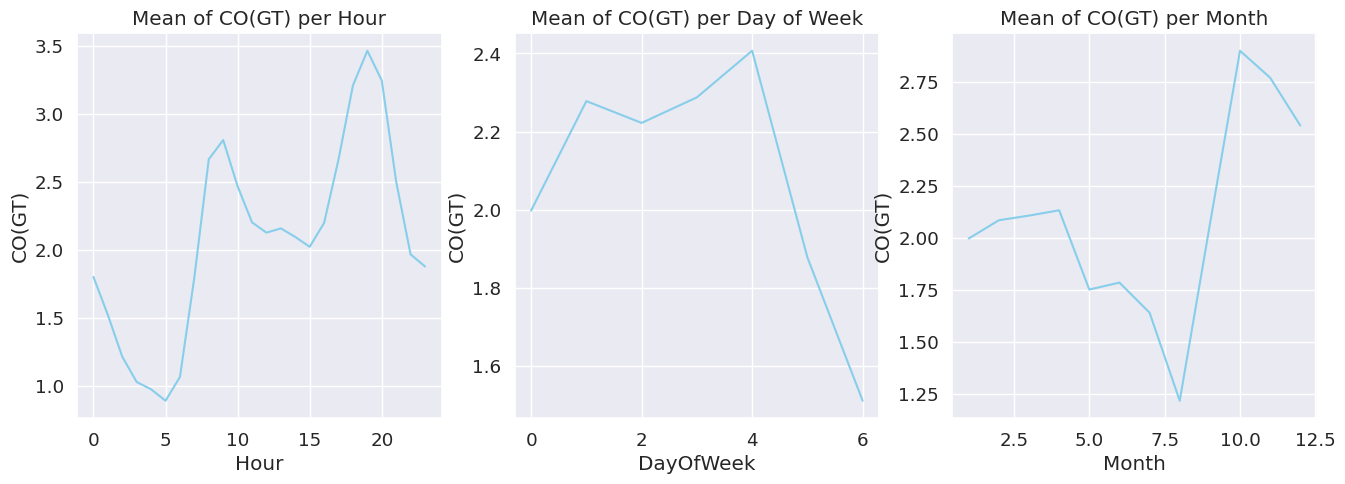

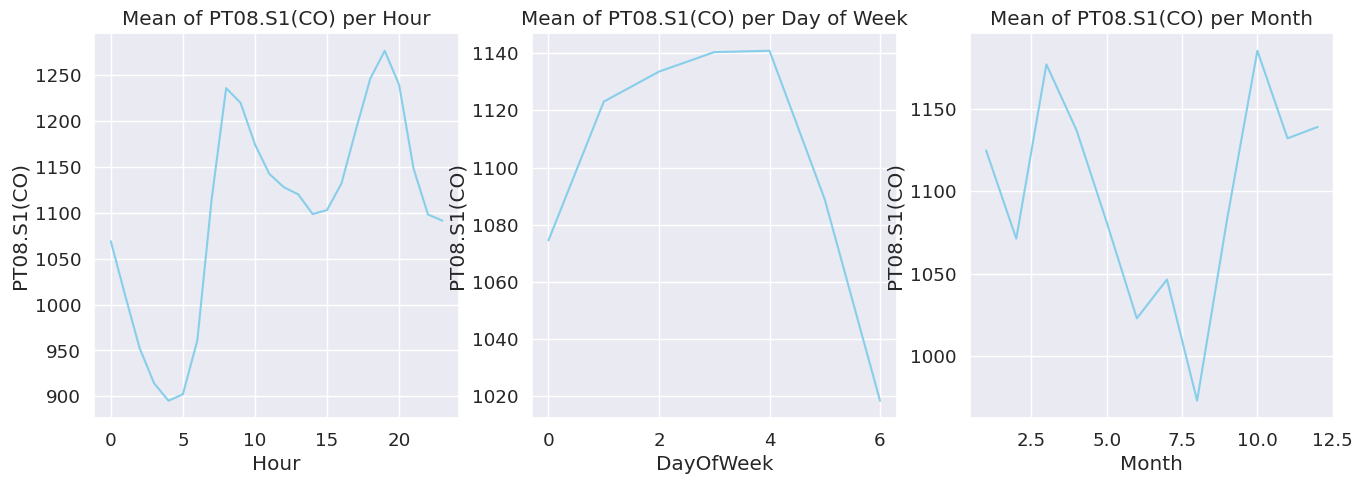

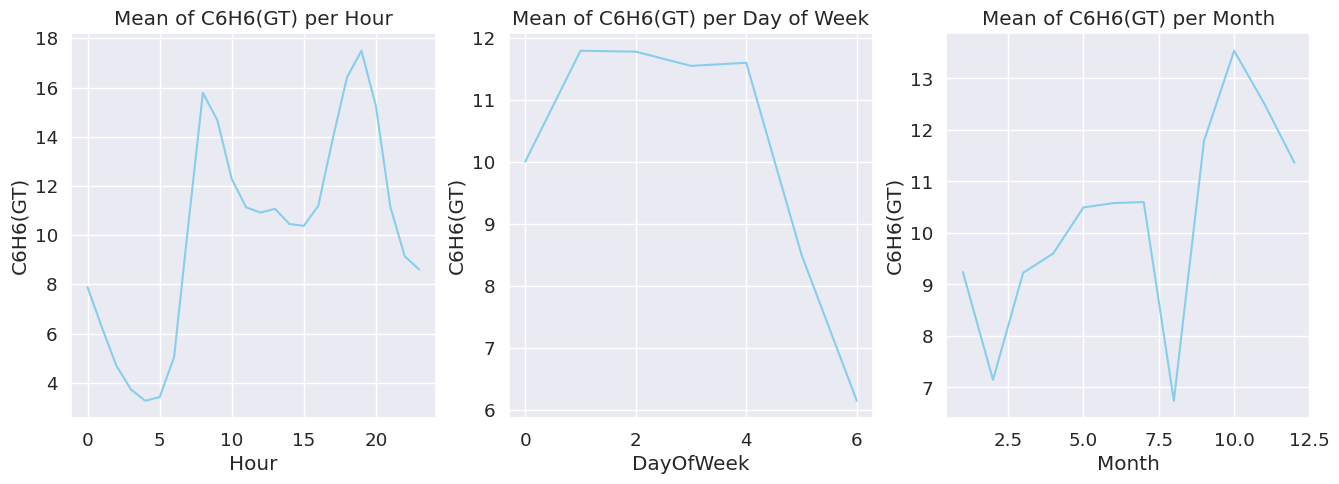

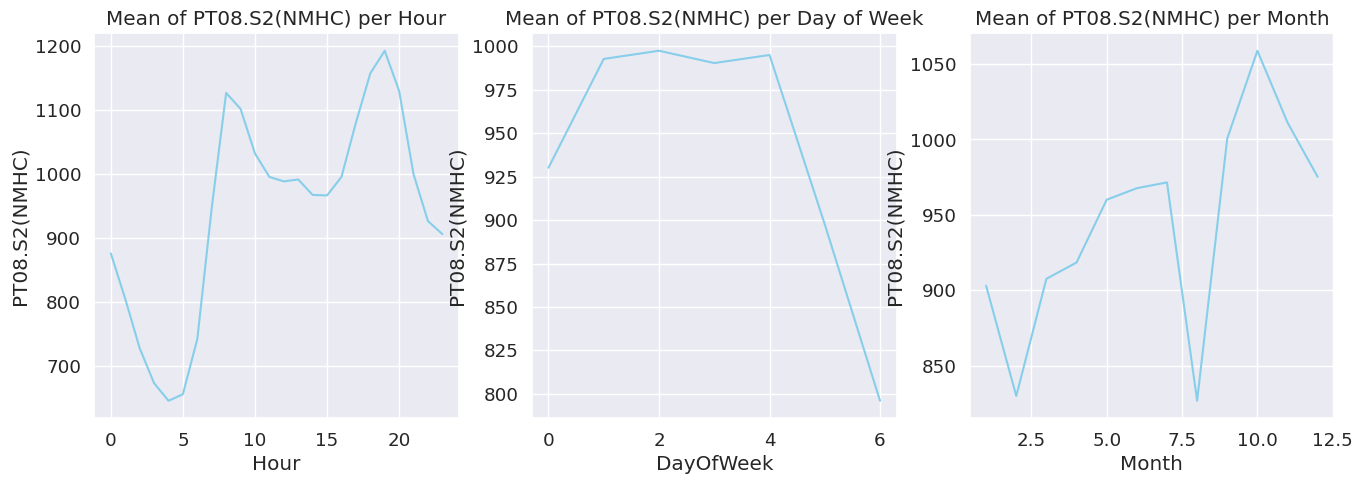

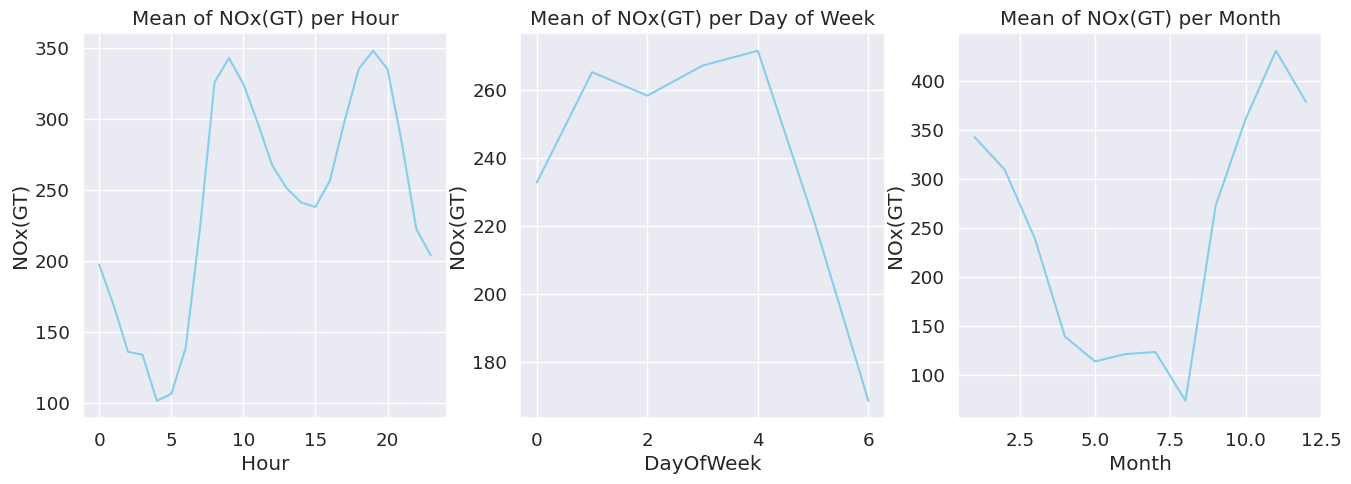

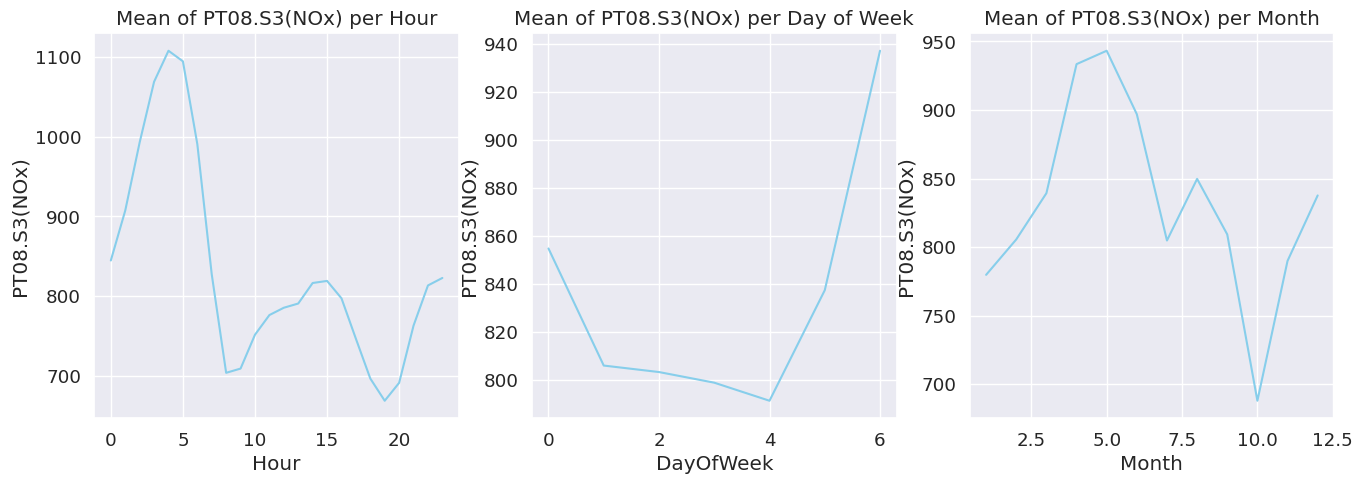

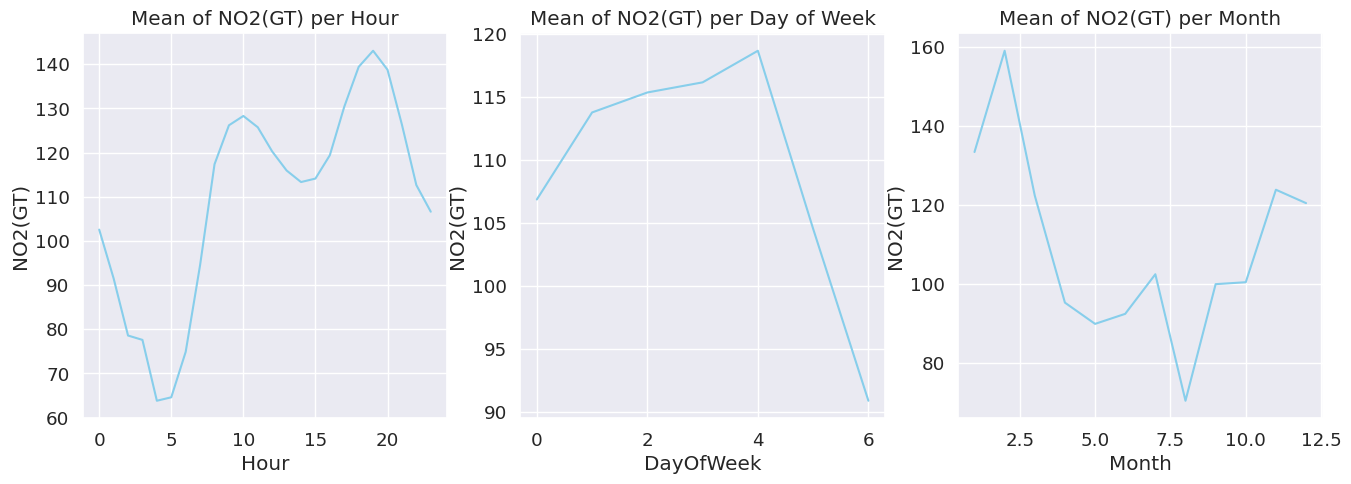

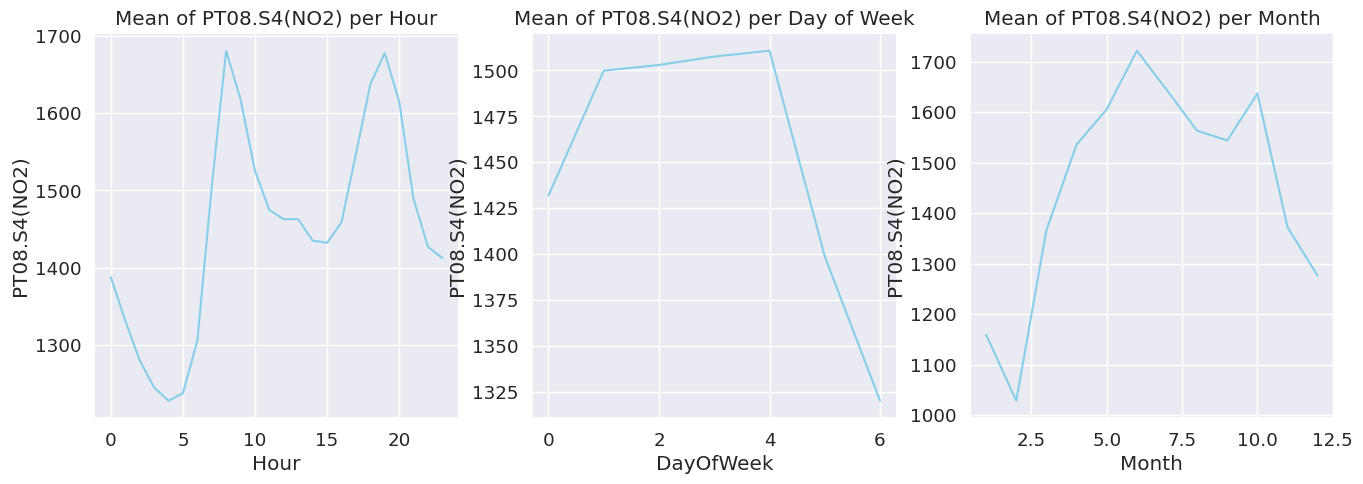

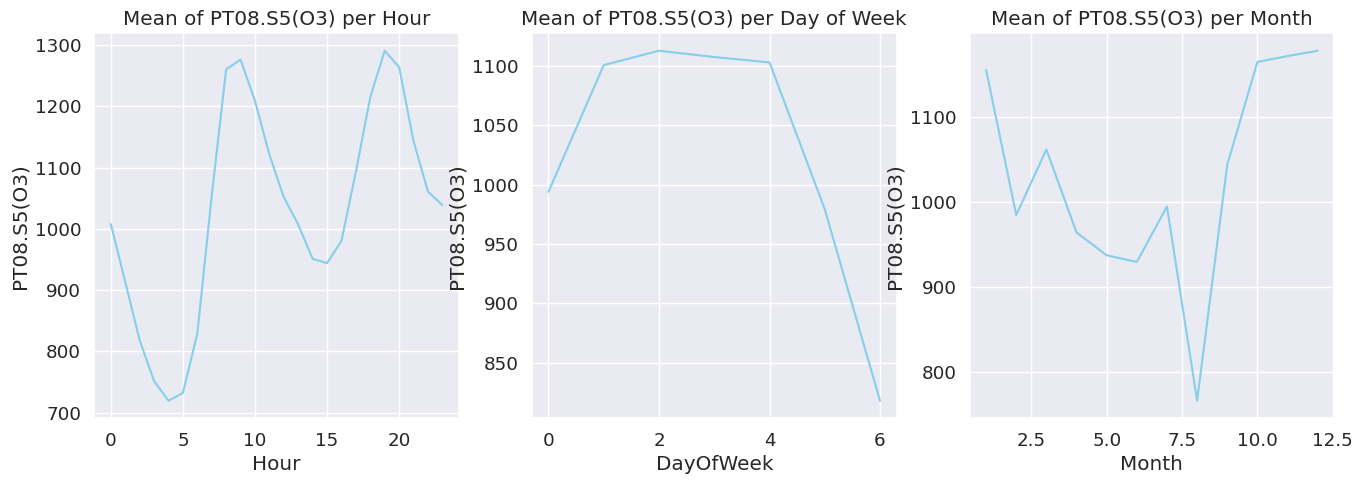

In [23]:
pollutant_columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

for column in pollutant_columns:
    plot_temporal_behavior(df, column)

As expected, the pollutant levels tend to be higher on weekdays and lower on weekends. And as illustrated in the charts above, there are two distinct peak hours: one in the morning, typically around 8 to 9a.m., and another one in the evening, approximately from 6 to 7p.m. These patterns may be associated with the traffic polution due to increased vehicular activity during peak commuting hours, leading to higher emissions of pollutants.

Examining the monthly plots, we also notice that pollution levels are notably elevated during the winter season of the country of this study, with a substancial decrease in pollutant concentrations observed during the summer months, particularly around August. 


Furthermore, as observed in the correlation matrix, the pollutant PT08.S3(NOx) have a completely opposite pattern compared to the other pollutants, with lower concentration levels on weekdays and higher levels on weekends. It also exhibits lower concentration levels during the winter seaon and higher concentration during summer months.

### Saving the processed dataset

Given the patterns and fluctuations in pollutant concentrations over time, we should definitely consider incorporating the variables of Hour, Month and Day of the Week as features for training a predictive model.

Therefore, we are removing the initial columns Date and Time, and mantaining the new features Hour, Month and Time before saving the dataset.

We will be using the processed dataset in the next notebook `UCI Air Quality - Relative Humidity Estimator` to develop a method for estimating Relative Humidity patterns based on pollutant concentration levels, temperature and datetime data.

In [24]:
df = df.drop(['Date','Time'], axis=1)

In [25]:
df.to_csv("data/cleaned-air-quality-dataset.csv", index=None)